# We Rate Dogs - Data Wrangling and Analysis Project

### Table of Contents
<ul>
<li><a href=\"#intro\">Introduction</a></li>
<li><a href=\"#Gathering\">Gathering</a></li>
<li><a href=\"#Assessing\">Assessing</a></li>
<li><a href=\"#Cleaning\">Cleaning</a></li>
<li><a href=\"#Storing\">Storing</a></li>
<li><a href=\"#Reporting\">Reporting</a></li>
</ul>


<a id='intro'></a>
### Introduction

For the `Wrangle and Analyze Data` project, I will be wrangling (and analyzing and visualizing) the tweet archive dataset of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

As part of this project, I will be gathering the data, assessing its quality & tidiness, cleaning this data before storing it and then reporting insights & providing visualizations. 


In [369]:
# insert all libraries you may need for this project here:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image

import requests

import tweepy
from tweepy import OAuthHandler

import json
from timeit import default_timer as timer

## <a id='Gathering'></a>
### Gathering

Gather each of the three pieces of data:
1. Download the WeRateDogs Twitter archive data file manually by clicking the following link provided by Udacity: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv). Upload this file into the jupyter notebook using the upload button. Import this dataset into a dataframe.


2. The tweet image predictions dataset, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers. Download the file programmatically using the [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) provided. Once the file is downloaded, import this dataset into a dataframe.


3. Get additional information like retweet count and favorite count from each tweet. Using tweet IDs in the WeRateDogs Twitter archive dataset, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called 'tweet_json.txt' file. Each tweet's JSON data is written to its own line. Read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

#### Gather Data 1: Twitter Archive Data

In [370]:
# Read the Twittwe Archive dataset into a dataframe called twt_arch
twt_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [371]:
# Display few records in the dataframe twt_arch
twt_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Gather Data 2: Image Prediction Data

In [372]:
# Use requests library to programmatically download the tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Save into a tsv file
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
    
# Read the image_predictions.tsv dataset into a dataframe called img_pred
img_pred = pd.read_csv('image_predictions.tsv', sep= '\t')

In [373]:
# Display few records in the dataframe img_pred
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Gather Data3: Additional Tweet Details using API

In [61]:
# Use tweepy to query Twitter's API and hide the API info here
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [62]:
# Get list of tweet_id from twt_arch dataset
twt_id = list(twt_arch['tweet_id'])
print(len(twt_id))

2356


In [ ]:
twt_suc = []
twt_fail = []
count = 0
with open('tweet_json.txt', 'w') as f:
    for tweet_id in twt_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            twt_suc.append(tweet_id)
            json.dump(tweet._json, f)
            f.write('\n')   
        except tweepy.TweepError as e:
            twt_fail.append(tweet_id)
            print('error')

1: 892420643555336193
error
2: 892177421306343426
error
3: 891815181378084864
error
4: 891689557279858688
error
5: 891327558926688256
error
6: 891087950875897856
error
7: 890971913173991426
error
8: 890729181411237888
error
9: 890609185150312448
error
10: 890240255349198849
error
11: 890006608113172480
error
12: 889880896479866881
error
13: 889665388333682689
error
14: 889638837579907072
error
15: 889531135344209921
error
16: 889278841981685760
error
17: 888917238123831296
error
18: 888804989199671297
error
19: 888554962724278272
error
20: 888202515573088257
error
21: 888078434458587136
error
22: 887705289381826560
error
23: 887517139158093824
error
24: 887473957103951883
error
25: 887343217045368832
error
26: 887101392804085760
error
27: 886983233522544640
error
28: 886736880519319552
error
29: 886680336477933568
error
30: 886366144734445568
error
31: 886267009285017600
error
32: 886258384151887873
error
33: 886054160059072513
error
34: 885984800019947520
error
35: 885528943205470208


error
278: 840370681858686976
error
279: 840268004936019968
error
280: 839990271299457024
error
281: 839549326359670784
error
282: 839290600511926273
error
283: 839239871831150596
error
284: 838952994649550848
error
285: 838921590096166913
error
286: 838916489579200512
error
287: 838831947270979586
error
288: 838561493054533637
error
289: 838476387338051585
error
290: 838201503651401729
error
291: 838150277551247360
error
292: 838085839343206401
error
293: 838083903487373313
error
294: 837820167694528512
error
295: 837482249356513284
error
296: 837471256429613056
error
297: 837366284874571778
error
298: 837110210464448512
error
299: 837012587749474308
error
300: 836989968035819520
error
301: 836753516572119041
error
302: 836677758902222849
error
303: 836648853927522308
error
304: 836397794269200385
error
305: 836380477523124226
error
306: 836260088725786625
error
307: 836001077879255040
error
308: 835685285446955009
error
309: 835574547218894849
error
310: 835536468978302976
error
311:

error
553: 804413760345620481
error
554: 804026241225523202
error
555: 803773340896923648
error
556: 803692223237865472


In [ ]:
# Check how many tweet_id did not get any data from the API
len(twt_fail)

In [374]:
# Read tweet_json.txt line by line into a list with 
# tweet ID, retweet count, and favorite count.
df_list = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})      

In [375]:
# moving additional tweet details (retweet_count and favorite_count) 
# from list into a dataframe called twt_add_details
twt_add_dets = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
twt_add_dets.head(5)

,id_str,retweet_count,favorite_count
0,892420643555336193,7291,34790
1,892177421306343426,5447,30143
2,891815181378084864,3590,22679
3,891689557279858688,7482,38058
4,891327558926688256,8035,36346


<a id='Assessing'></a>
### Assessing

#### Visual Assessment of datasets

In [376]:
# Visual assessment for Twitter Archive data 
twt_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [377]:
# Visual assessment for Image Prediction data 
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [378]:
# Visual assessment for Additional Tweet Details using API
twt_add_dets

,id_str,retweet_count,favorite_count
0,892420643555336193,7291,34790
1,892177421306343426,5447,30143
2,891815181378084864,3590,22679
3,891689557279858688,7482,38058
4,891327558926688256,8035,36346
5,891087950875897856,2698,18328
6,890971913173991426,1740,10672
7,890729181411237888,16359,58621
8,890609185150312448,3740,25237
9,890240255349198849,6312,28777


#### Programmatic Assessment:

#### Programmatic assessment of Twitter Archive data

In [379]:
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and 'expanded_urls' have missing data. 

In [380]:
# Check if there is any duplicate tweet_ids
twt_arch[twt_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [381]:
# Check for duplicated rows across all columns.
sum(twt_arch.duplicated())

0

In [382]:
# Check duplicated content for text 
sum(twt_arch.text.duplicated())

0

In [383]:
# Check duplicated content for expanded_urls 
sum(twt_arch.expanded_urls.duplicated())

137

There are 137 duplicated expanded urls. The ones corresponding to the retweet entries can be ignored as it will be cleaned. The real duplicates will need to be looked into and fixed. 

In [384]:
# Check numerator values
twt_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

The numerator entries more than 20 and less than 1 are either exaggerated, extracted incorrectly or are typos. There are a total of 26 entries

In [385]:
# Display numerator values that are greater than 20 and less than 1 
twt_arch[(twt_arch.rating_numerator > 20) | (twt_arch.rating_numerator < 1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [386]:
# Check Denominator values
twt_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The denominator entries less than 10 or more than 10 are either exaggerated, extracted incorrectly or are typos. There are a total of 23 entries

In [387]:
# Display denominator values that are less than 10 or greater than 10
twt_arch[(twt_arch.rating_denominator < 10) | (twt_arch.rating_denominator > 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [388]:
# Check names
twt_arch['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Toby            7
Bailey          7
Daisy           7
Buddy           7
Bella           6
Stanley         6
Jack            6
Milo            6
Leo             6
Rusty           6
Scout           6
Dave            6
Oscar           6
Jax             6
Koda            6
Sammy           5
             ... 
Arya            1
Lance           1
Augie           1
Chef            1
Molly           1
Joshwa          1
Chadrick        1
Christoper      1
Genevieve       1
Karl            1
Zeek            1
Bloop           1
Callie          1
Emanuel         1
Goose           1
Swagger         1
Danny           1
Traviss         1
Stark           1
Dante           1
Stella          1
Skye            1
Beemo           1
such            1
Saydee    

In [389]:
# Check number of valid entries under doggo
twt_arch['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [390]:
# Check number of valid entries under floofer
twt_arch['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [391]:
# Check number of valid entries under pupper
twt_arch['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [392]:
# Check number of valid entries under puppo
twt_arch['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [393]:
# printing a couple of source entries 
print(twt_arch['source'][0])
print(twt_arch['source'][2355])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [394]:
twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Programmatic assessment of Image Prediction data 

In [395]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [396]:
# Check for duplicated rows across all columns.
sum(img_pred.duplicated())

0

In [397]:
# Check if there is any duplicate tweet_ids
img_pred[img_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [398]:
# group img_num
img_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [399]:
# True means the p1 is a dog and false means p1 is not a dog
img_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [400]:
# True means the p2 is a dog and false means p2 is not a dog
img_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [401]:
# True means the p3 is a dog and false means p3 is not a dog
img_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [402]:
# Check the false values in p_dog columns. We assume when all three values
# are false then the picture is not of a dog.
dog_check = img_pred[(img_pred['p1_dog'] == False) & (img_pred['p2_dog'] == False) & (img_pred['p3_dog'] == False)]
dog_check.info()
dog_check.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
tweet_id    324 non-null int64
jpg_url     324 non-null object
img_num     324 non-null int64
p1          324 non-null object
p1_conf     324 non-null float64
p1_dog      324 non-null bool
p2          324 non-null object
p2_conf     324 non-null float64
p2_dog      324 non-null bool
p3          324 non-null object
p3_conf     324 non-null float64
p3_dog      324 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,European_fire_salamander,0.043178,False
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
233,670420569653809152,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,cardigan,0.153957,False,wig,0.072295,False


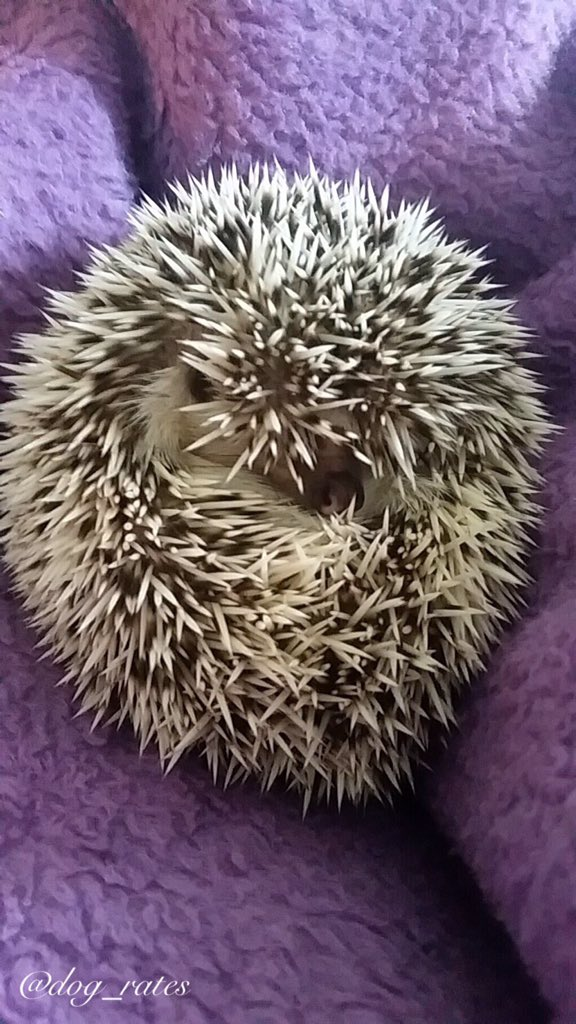

In [403]:
# Check an image URLs for the contents:
Image("https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg")

In [404]:
# Check the true values in p_dog columns. We assume when all three values
# are true then the picture is of a dog.
dog_check1 = img_pred[(img_pred['p1_dog'] == True) & (img_pred['p2_dog'] == True) & (img_pred['p3_dog'] == True)]
dog_check1.info()
dog_check1.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
img_num     1243 non-null int64
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,Shih-Tzu,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True
1914,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861,True,Doberman,0.050792,True,bluetick,0.021762,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True


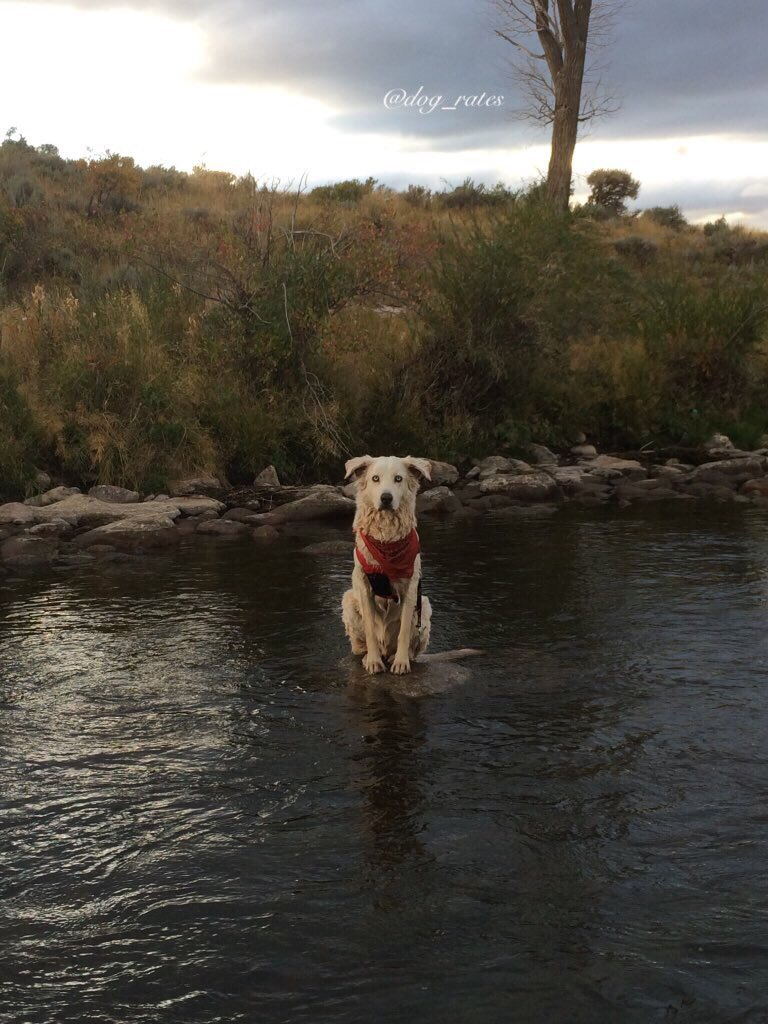

In [405]:
# Check an image URLs for the contents:
Image("https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg")

#### Programmatic assessment of Additional Tweet Details data

In [406]:
twt_add_dets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id_str            2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [407]:
# Check for duplicated rows across all columns.
sum(twt_add_dets.duplicated())

0

In [408]:
# Check if there is any duplicate tweet_ids
twt_add_dets[twt_add_dets.id_str.duplicated()]

,id_str,retweet_count,favorite_count


#### Assessment Summary:

#### Quality Issues

###### archive data:

1. 'in_reply_to_status_id' and 'in_reply_to_user_id' have missing data. Only 78 records present out of 2356. 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' have missing data. Only 181 records present out of 2356. As per project instructions we do not need these columns, only original tweet information is required.
2. 'expanded_urls' has some missing data. Only 2297 records present out of 2356.
3. Erroneous datatypes (for 'timestamp' and 'tweet_id') 
4. Column 'floofer' should be 'floof'. 
5. Coulmns 'rating_numerator' and 'rating_denominator' have some outliers. Numerators above 20 and less than 1 will be considered invalid/outlier. The denominator above 10 or below 10 will be considered invalid/outlier.
6. Duplicated 'expanded_urls' present. Not necessary to clean this for my analysis.
7. Missing names under 'None' and incorrect names like 'a', 'an', 'the' and so on. This will not be cleaned as part of my analysis.
8. Missing dog stage information under columns 'floof', 'doggo','puppo' and 'pupper'. This will not be cleaned as part of my analysis
9. 'source' column has no significant information. 

###### image prediction data:

1. 'p1', 'p2' and 'p3' has some names in upper case whereas some are in lower case
2. Erroneous datatype for 'tweet_id'
3. 'img_num' makes no logical sense to me. Can't interpret this column. This will not be cleaned as part of my analysis
4. If 'p1_dog', 'p2_dog' and 'p3_dog' are all false; chances are the entry is not for a dog. This will not be cleaned as part of my analysis

###### additional tweet details data:

1. id_str needs to change to tweet_id to help merge the different datasets.


#### Tidiness Issues
1. The dog stage is one variable and hence should form single column. 
2. All three tables can be merged on 'tweet_id'


<a id='Cleaning'></a>
### Cleaning

In [409]:
# Make copies of each dataset
twt_arch_clean = twt_arch.copy()
img_pred_clean = img_pred.copy()
twt_add_dets_clean = twt_add_dets.copy()

#### Quality Issues

#### Archive Data:

#### 1. Remove retweets and replies keeping only original tweets from twt_arch_clean table 

###### Define

Delete the rows that have values in retweet columns and replies columns. Once the rows are deleted, delete the retweet and replies columns too from twt_arch_clean .

###### Code

In [410]:
# Move only rows that have no entry in the column 'in_reply_to_status_id'
twt_arch_clean = twt_arch_clean[twt_arch_clean['in_reply_to_status_id'].isnull()]

# Move only rows that have no entry in the column 'retweeted_status_id'
twt_arch_clean = twt_arch_clean[twt_arch_clean['retweeted_status_id'].isnull()]

# Add all columns to be dropped in drop_cols
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

# drop cols
twt_arch_clean.drop(drop_cols, axis = 1, inplace=True)

##### Test

In [411]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


The rows with data in retweet and replies columns have been deleted. The retweet and replies columns have also been deleted.

The expanded_urls column still have a few missing data in them.

#### 2. Delete rows that have missing 'expanded_urls'  

###### Define

Delete the rows that have missing values in 'expanded_urls' columns using dropna method.

###### Code

In [412]:
# Display the rows that have no entry for column expanded_urls
twt_arch_clean[twt_arch_clean.isna().expanded_urls]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [413]:
# Drop the rows that have missing values in 'expanded_urls' column.
twt_arch_clean.dropna(axis=0,subset=['expanded_urls'],inplace=True)

##### Test

In [414]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


In [415]:
# Display the rows that have no entry for column expanded_urls
twt_arch_clean[twt_arch_clean.isna().expanded_urls]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Three entries that had missing expanded_urls has been deleted along with the entire row. Now the number of rows in twt_arch_clean is 2094 which was reduced from 2097.

#### 3. Erroneous datatypes (for 'timestamp' and 'tweet_id')

###### Define

1. Change the dtype of column timestamp from object to datetime using to_datetime() 
2. Change the dtype of column tweet_id from int64 to object using the astype()

###### Code

In [416]:
twt_arch_clean['timestamp'] = pd.to_datetime(twt_arch_clean['timestamp'])
twt_arch_clean['tweet_id'] = twt_arch_clean['tweet_id'].astype('str')

##### Test

In [417]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### 4. Column 'floofer' should be 'floof'.

###### Define
Update column name from 'floofer' to 'floof' using rename method.


###### Code

In [418]:
twt_arch_clean.rename(columns = {'floofer':'floof'}, inplace=True)

#### Test

In [419]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floof                 2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### 5.  Coulmns 'rating_numerator' and 'rating_denominator' have some outliers. Numerators above 20 and less than 1 will be considered invalid/outlier. The denominator above 10 or below 10 will be considered invalid/outlier.

###### Define
Delete any record that has a numerator above 20 and less than 1. Also delete any record that has a deniminator less than 10 or greater than 10. Create a column called rating, the value in it will be populated by divding rating_numerator by rating_denominator.

Note:We are doing this because the number of records that fit this criteria are less and individually analyzing and fixing these records will take a long time. 


###### Code

In [420]:
twt_arch_clean = twt_arch_clean[(twt_arch_clean.rating_numerator <= 20) & (twt_arch_clean.rating_numerator >= 1)]

In [421]:
twt_arch_clean = twt_arch_clean[(twt_arch_clean.rating_denominator == 10)]

In [422]:
# Create a new column rating.
twt_arch_clean['rating'] = twt_arch_clean['rating_numerator']/twt_arch_clean['rating_denominator']

#### Test

In [423]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
doggo                 2071 non-null object
floof                 2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
rating                2071 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 226.5+ KB


23 entries were deleted as part of this clean up

#### Image Prediction Data:

#### 1. 'p1', 'p2' and 'p3' has some names in upper case whereas some are in lower case

###### Define
Convert all the names under p1, p2 and p3 using str.lower()


###### Code

In [424]:
img_pred_clean['p1'] = img_pred_clean.p1.str.lower()

In [425]:
img_pred_clean['p2'] = img_pred_clean.p2.str.lower()

In [426]:
img_pred_clean['p3'] = img_pred_clean.p3.str.lower()

#### Test

In [427]:
img_pred_clean.p1.sample(5)

747     miniature_pinscher
955              chihuahua
1831          wooden_spoon
347               terrapin
292              chihuahua
Name: p1, dtype: object

In [428]:
img_pred_clean.p2.sample(5)

1599                     redbone
704             golden_retriever
1327    chesapeake_bay_retriever
132                       hamper
1761            golden_retriever
Name: p2, dtype: object

In [429]:
img_pred_clean.p3.sample(5)

153                    basenji
1994              newfoundland
1572                     swing
120     welsh_springer_spaniel
219                 box_turtle
Name: p3, dtype: object

#### 2. Erroneous datatype for 'tweet_id'

###### Define
Change the dtype of column tweet_id from int64 to object using the astype()


###### Code

In [430]:
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype('str')

##### Test

In [431]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Additional Tweet Details Data:

#### 1. id_str needs to change to tweet_id to help merge the different datasets.'

###### Define
Update column name from 'id_str' to 'tweet_id' using rename method.


###### Code

In [432]:
twt_add_dets_clean.rename(columns = {'id_str':'tweet_id'}, inplace=True)

#### Test

In [433]:
twt_add_dets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Tidiness Issues

#### 1. The dog stage is one variable and hence should form single column.

#### Define
Dog stage is one variable which is spread across 4 columns - doggo, floof, pupper, puppo. Melt wont work in this case because there are 'None' values across all 4 columns.

To fix this, replace 'None' in all 4 columns with empty string. Combine 4 columns into a single stage column. Format entries with multiple dog stages like doggopupper as doggo,pupper. Delete the 4 columns which is not needed anymore.

#### Code

In [434]:
# Replace None in stage columns with empty string as follows.
twt_arch_clean.doggo.replace('None', '', inplace=True)  
twt_arch_clean.floof.replace('None', '', inplace=True)
twt_arch_clean.pupper.replace('None', '', inplace=True)
twt_arch_clean.puppo.replace('None', '', inplace=True)

# Combine stage columns.
twt_arch_clean['stage'] = twt_arch_clean.doggo + twt_arch_clean.floof + twt_arch_clean.pupper + twt_arch_clean.puppo


In [435]:
# Display all distinct values under stage
twt_arch_clean.stage.value_counts()

                1737
pupper           219
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [436]:
# Format entries with multiple dog stages which appeared like doggopupper.
twt_arch_clean.loc[twt_arch_clean.stage == 'floofer', 'stage'] = 'floof'
twt_arch_clean.loc[twt_arch_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twt_arch_clean.loc[twt_arch_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twt_arch_clean.loc[twt_arch_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floof'

In [437]:
# Add all columns to be dropped in drop_cols
drop_col = ['doggo', 'floof', 'pupper', 'puppo']

# drop cols
twt_arch_clean.drop(drop_col, axis = 1, inplace=True)


#### Test

In [438]:
# This shows that the retweet and replies column have been dropped already
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
rating                2071 non-null float64
stage                 2071 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 178.0+ KB


In [439]:
# Display all distinct values under stage.
twt_arch_clean.stage.value_counts()

                1737
pupper           219
doggo             72
puppo             23
doggo,pupper       9
floof              9
doggo,floof        1
doggo,puppo        1
Name: stage, dtype: int64

#### 2. All three tables can be merged on 'tweet_id'

#### Define
Merge `twt_arch_clean` and `twt_add_dets_clean` on the column tweet_id into one table using the pd.merge() method.

Then merge `merge_twt_data` and `img_pred_clean` on the column tweet_id into one table using the pd.merge() method

#### Code


In [440]:
merge_twt_data = pd.merge(twt_arch_clean,twt_add_dets_clean, on='tweet_id', how = 'inner')

#### Test

In [441]:
merge_twt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 12 columns):
tweet_id              2064 non-null object
timestamp             2064 non-null datetime64[ns]
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2064 non-null int64
rating_denominator    2064 non-null int64
name                  2064 non-null object
rating                2064 non-null float64
stage                 2064 non-null object
retweet_count         2064 non-null int64
favorite_count        2064 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 209.6+ KB


#### Code

In [442]:
merge_all_data = pd.merge(merge_twt_data, img_pred_clean, how = 'inner', on='tweet_id')

#### Test

In [443]:
merge_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 23 columns):
tweet_id              1941 non-null object
timestamp             1941 non-null datetime64[ns]
source                1941 non-null object
text                  1941 non-null object
expanded_urls         1941 non-null object
rating_numerator      1941 non-null int64
rating_denominator    1941 non-null int64
name                  1941 non-null object
rating                1941 non-null float64
stage                 1941 non-null object
retweet_count         1941 non-null int64
favorite_count        1941 non-null int64
jpg_url               1941 non-null object
img_num               1941 non-null int64
p1                    1941 non-null object
p1_conf               1941 non-null float64
p1_dog                1941 non-null bool
p2                    1941 non-null object
p2_conf               1941 non-null float64
p2_dog                1941 non-null bool
p3                    1941 non-

<a id='Stroing'></a>
### Storing

In [444]:
# Storing merged data into twitter_merged_master.csv file
merge_all_data.to_csv('twitter_merged_master.csv', index=False)

In [445]:
#Storing twt_arch_clean data into twitter_archive_master.csv file
twt_arch_clean.to_csv('twitter_archive_master.csv', index=False)

In [446]:
#Storing twt_add_dets_clean data into twitter_additional_details_master.csv file
twt_add_dets_clean.to_csv('twitter_additional_details_master.csv', index=False)

In [447]:
#Storing img_pred_clean data into twitter_image_prediction_master.csv file
img_pred_clean.to_csv('twitter_image_prediction_master.csv', index=False)

In [448]:
# dropping some columns that aren't needed for analysis
drop_cols = ['source', 'text', 'rating_numerator', 'rating_denominator', 'jpg_url', 'img_num']

# drop cols
final_copy = merge_all_data.drop(drop_cols, axis = 1)

final_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 17 columns):
tweet_id          1941 non-null object
timestamp         1941 non-null datetime64[ns]
expanded_urls     1941 non-null object
name              1941 non-null object
rating            1941 non-null float64
stage             1941 non-null object
retweet_count     1941 non-null int64
favorite_count    1941 non-null int64
p1                1941 non-null object
p1_conf           1941 non-null float64
p1_dog            1941 non-null bool
p2                1941 non-null object
p2_conf           1941 non-null float64
p2_dog            1941 non-null bool
p3                1941 non-null object
p3_conf           1941 non-null float64
p3_dog            1941 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 233.1+ KB


<a id='Reporting'></a>
### Reporting and Visualization

In [449]:
# Display some descriptive statistics
final_copy.describe().round(4)

,rating,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1941.0000,1941.0000,1941.0000,1941.0000,1941.0000,1941.0000
mean,1.0537,2339.0263,7991.7161,0.5935,0.1351,0.0603
std,0.2163,4193.2247,11787.2881,0.2722,0.1011,0.0509
min,0.1000,11.0000,69.0000,0.0443,0.0000,0.0000
25%,1.0000,520.0000,1684.0000,0.3604,0.0539,0.0161
50%,1.1000,1128.0000,3599.0000,0.5873,0.1182,0.0495
75%,1.2000,2674.0000,9968.0000,0.8453,0.1964,0.0917
max,1.4000,73560.0000,149439.0000,1.0000,0.4880,0.2710


The above gives some statistics like:
1. The max rating is 1.4 and min is 0.1; the average rating is 1.05
2. The average number of retweet is 2339; min is 11 and max is 73560
3. The mean of favourite count is 7991; min 69 and max 149439
4. The p1_conf, p2_conf and p3_conf are within 0 and 1. This is correct as these values are supposed to be confidence interval which shows whether the p1, p2 and p3 are dogs or not.

#### 1. Top 10 dog (names) that have highest mean rating

In [450]:
dogname_rating = final_copy.groupby(['name']).mean()['rating']
dogname_rating.sort_values(ascending = False).head(10)

name
Kuyu        1.4
Smiley      1.4
Iggy        1.4
Sundance    1.4
General     1.4
Doobert     1.4
Clifford    1.4
Cermet      1.4
Laika       1.4
Emmy        1.4
Name: rating, dtype: float64

All the above dog names have an average rating of 1.4

#### 2. Top 10 dog breeds in terms of the confidence-level on average

p1
komondor                       0.972531
brittany_spaniel               0.874545
keeshond                       0.844431
bull_mastiff                   0.815618
bernese_mountain_dog           0.801816
french_bulldog                 0.777413
pug                            0.759223
pomeranian                     0.751073
samoyed                        0.740719
german_short-haired_pointer    0.732425
Name: p1_conf, dtype: float64

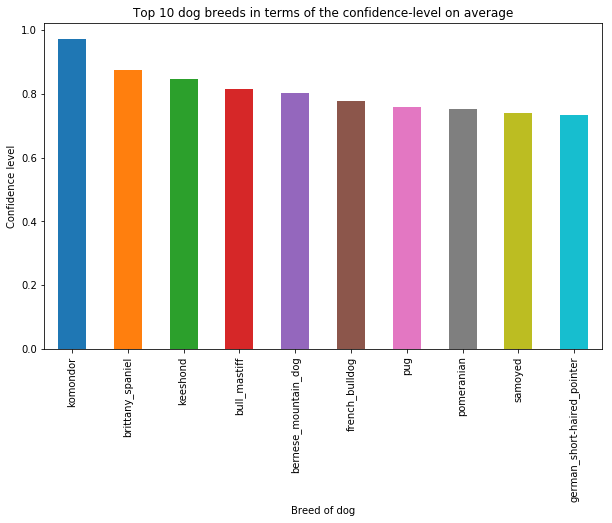

In [451]:
true_dogs = final_copy[(final_copy['p1_dog']== True)]
dogbreed_highconf = true_dogs.groupby(['p1']).mean()['p1_conf']
dogbreed_highconf.sort_values(ascending = False).head(10).plot('bar',figsize=(10,6))
plt.title('Top 10 dog breeds in terms of the confidence-level on average')
plt.xlabel('Breed of dog');
plt.ylabel('Confidence level')

dogbreed_highconf.sort_values(ascending = False).head(10)

The dog breed with highest average confidence level is komondor at 97% confidence. 

Please note: This is populated using only p1 dog breeds with p1_dog as True which indicates p1 is a dog.

#### 3. 15 highest rated dog breed on an average. 
Note: Will be using columns p1 and p1_dog for this. 

p1
saluki                1.250000
briard                1.233333
tibetan_mastiff       1.225000
border_terrier        1.214286
silky_terrier         1.200000
standard_schnauzer    1.200000
eskimo_dog            1.177778
gordon_setter         1.175000
irish_setter          1.175000
samoyed               1.174359
chow                  1.160976
golden_retriever      1.156716
cardigan              1.152941
australian_terrier    1.150000
giant_schnauzer       1.150000
Name: rating, dtype: float64

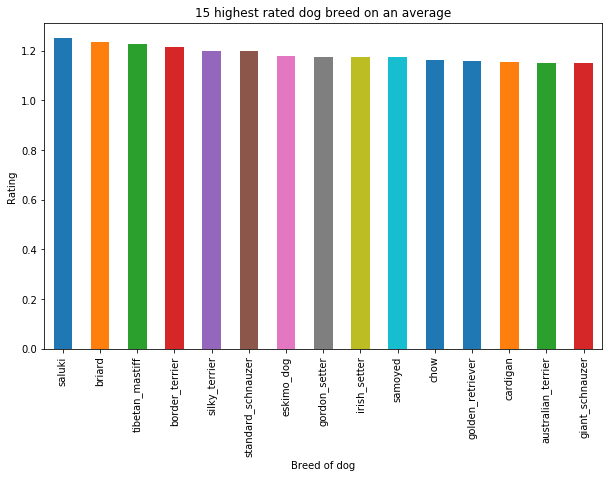

In [452]:
dogbreed_rating = true_dogs.groupby(['p1']).mean()['rating']
dogbreed_rating.sort_values(ascending = False).head(15).plot('bar',figsize=(10,6))
plt.title('15 highest rated dog breed on an average')
plt.xlabel('Breed of dog');
plt.ylabel('Rating')

dogbreed_rating.sort_values(ascending = False).head(15)

The highest rated dog breed on an average is Saluki with a rating of 1.25

Please note: This is populated using only p1 dog breeds with p1_dog as True which indicates p1 is a dog.

#### 4. Most popular dog breed (count)

golden_retriever            134
labrador_retriever           89
pembroke                     88
chihuahua                    78
pug                          54
chow                         41
samoyed                      39
pomeranian                   37
toy_poodle                   36
malamute                     29
cocker_spaniel               27
french_bulldog               25
chesapeake_bay_retriever     23
miniature_pinscher           21
german_shepherd              20
Name: p1, dtype: int64

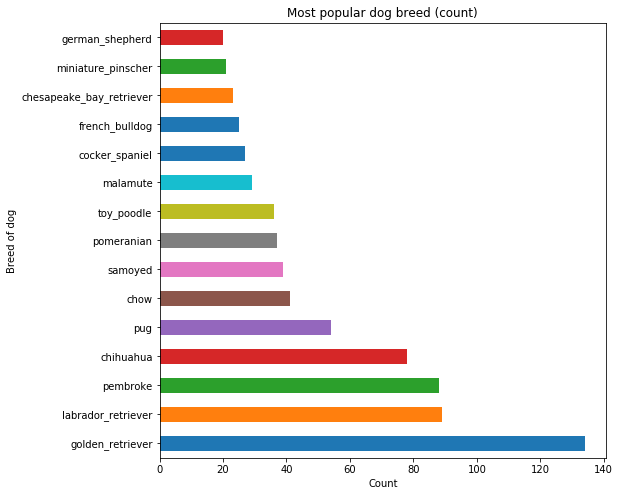

In [453]:
true_dogs.p1.value_counts().sort_values(ascending = False).head(15).plot('barh',figsize=(8,8))
plt.title('Most popular dog breed (count)')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

true_dogs.p1.value_counts().sort_values(ascending = False).head(15)

The most popular dog breed on the basis of count is golden_retriever at 134 followed by labrador_retriever at 89

Please note: This is populated using only p1 dog breeds with p1_dog as True which indicates p1 is a dog.

#### 5. Most common dog names

In [454]:
final_copy.name.value_counts().sort_values(ascending = False).head(5)

None       510
a           54
Charlie     10
Cooper      10
Oliver      10
Name: name, dtype: int64

The most common dog names seem to be Cooper, Charlie and Oliver. The names 'None' and 'a' were fetched incorrectly while gathering data. This was not cleaned as there were too many of them.

#### 6. Which dog breeds have the highest average retweet and favorite-count 

p1
standard_poodle          5610.000000
english_springer         5043.111111
afghan_hound             4954.666667
eskimo_dog               4578.833333
saluki                   4285.500000
giant_schnauzer          4281.500000
great_pyrenees           4135.153846
french_bulldog           4070.760000
lakeland_terrier         4001.533333
flat-coated_retriever    3847.500000
Name: retweet_count, dtype: float64

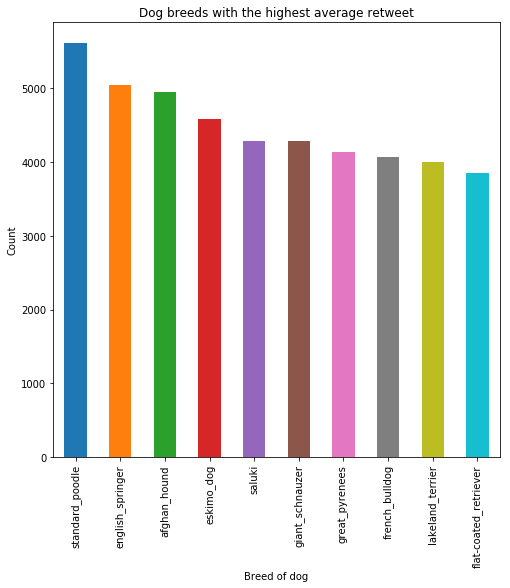

In [455]:
# Retweet count
retweet_count = (true_dogs.groupby(['p1']).mean()['retweet_count'])
retweet_count.sort_values(ascending = False).head(10).plot('bar', figsize=(8,8))
plt.title('Dog breeds with the highest average retweet')
plt.xlabel('Breed of dog');
plt.ylabel('Count')

retweet_count.sort_values(ascending = False).head(10)

On average the breed standard_poodle appears to be retweeted most followed by english_springer.

p1
saluki                     21422.000000
french_bulldog             16829.480000
afghan_hound               15163.333333
giant_schnauzer            15132.000000
black-and-tan_coonhound    15087.000000
flat-coated_retriever      14942.125000
irish_water_spaniel        14393.666667
standard_poodle            14039.571429
english_springer           13852.666667
cardigan                   13450.647059
Name: favorite_count, dtype: float64

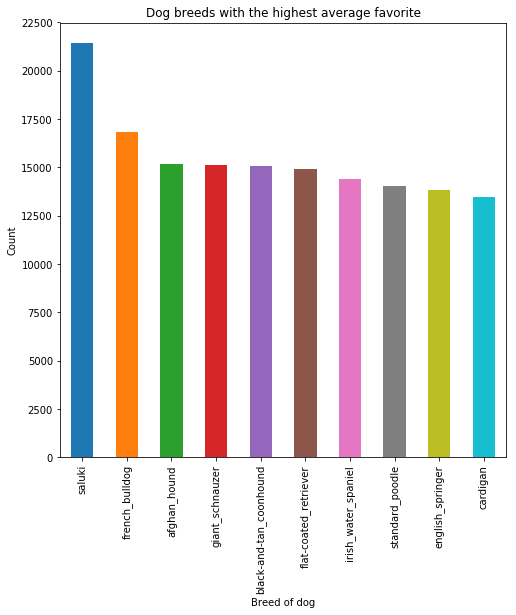

In [456]:
# Favourite count
retweet_count = (true_dogs.groupby(['p1']).mean()['favorite_count'])
retweet_count.sort_values(ascending = False).head(10).plot('bar', figsize=(8,8))
plt.title('Dog breeds with the highest average favorite')
plt.xlabel('Breed of dog');
plt.ylabel('Count')

retweet_count.sort_values(ascending = False).head(10)

On average the breed saluki appears to be most favorite followed by french_bulldog

#### 7. The retweet counts and favorite counts comparison using scatter plot

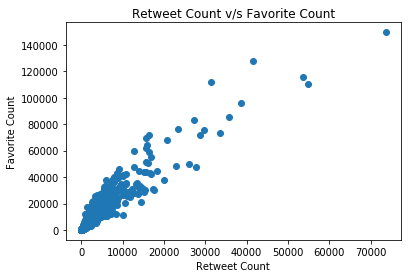

In [457]:
plt.scatter(final_copy.retweet_count, final_copy.favorite_count);
plt.title('Retweet Count v/s Favorite Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

There is a positive correlation between retweet count and favorite count.

#### 8. Plot time series - retweet count and favorite count

In [458]:
df_timeseries = pd.DataFrame(final_copy, columns=['timestamp','retweet_count', 'favorite_count'])

# Set the timestamp as Index
df_timeseries.index = df_timeseries['timestamp']
del df_timeseries['timestamp']
df_timeseries.sample(5)

# use resample to get better visualization. Here I have resampled the average data on a monthly basis
retweet_resample = df_timeseries['retweet_count'].resample('1m').mean()
favorite_resample = df_timeseries['favorite_count'].resample('1m').mean()


In [459]:
# Display the resampled retweet data (by month)
retweet_resample

timestamp
2015-11-30     437.774744
2015-12-31    1258.612360
2016-01-31    1195.280488
2016-02-29    1372.358491
2016-03-31    1399.339130
2016-04-30    1370.192308
2016-05-31    1878.727273
2016-06-30    3626.602564
2016-07-31    2104.541176
2016-08-31    3060.067797
2016-09-30    3073.983607
2016-10-31    3522.421875
2016-11-30    4102.673077
2016-12-31    4718.528302
2017-01-31    5431.707692
2017-02-28    3646.096774
2017-03-31    3924.155556
2017-04-30    4957.525000
2017-05-31    6630.000000
2017-06-30    5535.767442
2017-07-31    5812.224490
2017-08-31    6369.000000
Freq: M, Name: retweet_count, dtype: float64

In [460]:
# Display the resampled favorite data (by month)
favorite_resample

timestamp
2015-11-30     1056.883959
2015-12-31     3115.014045
2016-01-31     3358.689024
2016-02-29     3886.688679
2016-03-31     4097.400000
2016-04-30     4243.365385
2016-05-31     5633.600000
2016-06-30     9201.012821
2016-07-31     6304.564706
2016-08-31     9122.847458
2016-09-30    10019.409836
2016-10-31    11546.468750
2016-11-30    13049.115385
2016-12-31    14946.528302
2017-01-31    17716.261538
2017-02-28    16316.516129
2017-03-31    17691.133333
2017-04-30    20880.975000
2017-05-31    26956.476190
2017-06-30    25946.906977
2017-07-31    28750.102041
2017-08-31    32466.500000
Freq: M, Name: favorite_count, dtype: float64

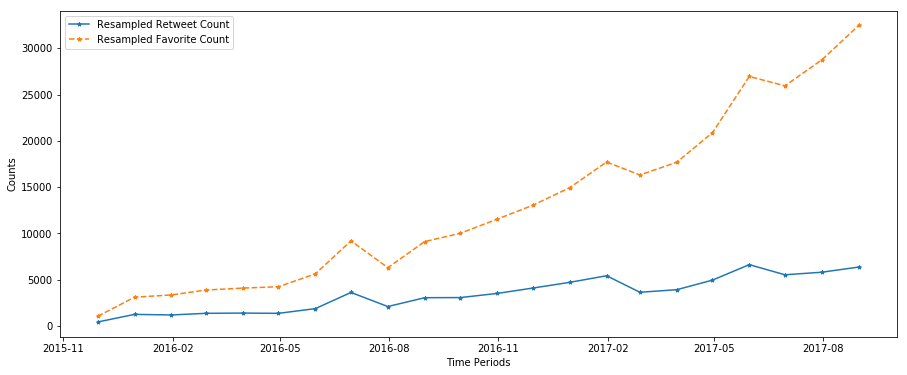

In [461]:
# Plot a time series 
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(retweet_resample, marker='*', markersize=4, linestyle='-', label='Resampled Retweet Count')
ax.plot(favorite_resample, marker='*', markersize=4, linestyle='--', label='Resampled Favorite Count')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Periods')
ax.legend();

The time series graph above shows a positive correlation between favorite_count and retweet_count. Looks like people retweet posts/tweets they like so that others can also view them in their feed.

#### References


1. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
2. https://docs.tweepy.org/en/stable/getting_started.html#api
3. https://docs.tweepy.org/en/v3.5.0/api.html
4. https://wiki.python.org/moin/HandlingExceptions
5. https://docs.tweepy.org/en/latest/getting_started.html
6. https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
9. https://www.tutorialspoint.com/python_data_science/python_time_series.htm#:~:text=Python%20-%20Time%20Series.%20Time%20series%20is%20a,a%20region%20at%20different%20months%20of%20the%20year
10. https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list
11. https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
12. https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column
13. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
14. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
15. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html
16. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
17. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html
18. https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
19. https://benalexkeen.com/resampling-time-series-data-with-pandas/

